In [25]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, make_scorer
import warnings
warnings.filterwarnings('ignore')





<b>Тестовое задание</b>

Цель: 
•	Построить модель PD (Probability of default) в Python (предпочтительно) или R на основе количественных факторов из финансовой отчетности банков-контрагентов по алгоритму, описанному ниже;
•	Мы просим подробно описывать выводы , которые вы делаете.

Данные: файл “Data.csv” содержит перечень количественных факторов (qn01,…qn10) и значения PD для выборки из 303 банков-контрагентов. Размерность факторов qn01-qn06 указана в столбцах “Unit qnXX”, факторы qn07-qn10 представлены в процентах. 


<b>1. Внимательно изучите данные. </b>

In [3]:
#Читаем и смотрим
data = pd.read_csv('Data.csv',sep = ';' )
data.shape
data.head(5)



,PD,qn01,Unit_qn01,qn02,Unit_qn02,qn03,Unit_qn03,qn04,Unit_qn04,qn05,Unit_qn05,qn06,Unit_qn06,qn07,qn08,qn09,qn10
0,0.00025,2193.438720,MLN,6913.265920,MLN,16542.941360,MLN,66144.563760,MLN,168631.75120,MLN,0.000000,MLN,NaN,15.9720,14.0096,0.67056
1,0.00485,81.928000,MLN,22.000000,MLN,1031.096000,MLN,417.472000,MLN,1370.60000,MLN,1432.200000,MLN,109.34000,15.1272,15.1272,0.45760
2,0.08545,615.436052,MLN,144.399807,MLN,3132.243664,MLN,652.291886,MLN,2448.10515,MLN,NaN,MLN,14.43200,15.3120,15.2240,0.20856
3,0.00485,149.451236,MLN,99.557867,MLN,3580.421346,MLN,49.435628,MLN,3664.64501,MLN,4264.509779,MLN,778.89328,12.5664,NaN,1.34376
4,0.02385,52.342400,MLN,21.964800,MLN,262.917600,MLN,105.793600,MLN,502.48880,MLN,575.528800,MLN,105.42400,12.1352,8.2984,2.34960


In [4]:
#таблица объект - признак
X = data.drop(['PD','Unit_qn01', 'Unit_qn02','Unit_qn03',
              'Unit_qn04','Unit_qn05','Unit_qn06'],1)
#целевая переменная 
y = data['PD']


C:\Users\Егор\AppData\Local\Temp\ipykernel_24152\1959498249.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['PD','Unit_qn01', 'Unit_qn02','Unit_qn03',


In [525]:
X.head(5)

,qn01,qn02,qn03,qn04,qn05,qn06,qn07,qn08,qn09,qn10
0,2193.438720,6913.265920,16542.941360,66144.563760,168631.75120,0.000000,NaN,15.9720,14.0096,0.67056
1,81.928000,22.000000,1031.096000,417.472000,1370.60000,1432.200000,109.34000,15.1272,15.1272,0.45760
2,615.436052,144.399807,3132.243664,652.291886,2448.10515,NaN,14.43200,15.3120,15.2240,0.20856
3,149.451236,99.557867,3580.421346,49.435628,3664.64501,4264.509779,778.89328,12.5664,NaN,1.34376
4,52.342400,21.964800,262.917600,105.793600,502.48880,575.528800,105.42400,12.1352,8.2984,2.34960


In [526]:
X.dropna().shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   qn01    303 non-null    float64
 1   qn02    303 non-null    float64
 2   qn03    301 non-null    float64
 3   qn04    300 non-null    float64
 4   qn05    303 non-null    float64
 5   qn06    244 non-null    float64
 6   qn07    283 non-null    float64
 7   qn08    287 non-null    float64
 8   qn09    257 non-null    float64
 9   qn10    303 non-null    float64
dtypes: float64(10)
memory usage: 23.8 KB


In [7]:
"""" Для начала произведём разделение на тестовую и валидационную выборки, чтобы при нормализации фичей 
информация из валидационной выборки не перетекла в тестовую """
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head(5)

,qn01,qn02,qn03,qn04,qn05,qn06,qn07,qn08,qn09,qn10
137,1831.192000,1695.845114,47353.768000,25209.330860,84667.704000,NaN,427.09040,NaN,NaN,0.73304
106,82.837436,27.468795,467.454909,105.867758,532.126716,861.819886,68.81336,12.320,8.3600,2.72712
284,673.605539,156.028365,4003.725968,1736.988704,3455.390382,4044.309474,6.39760,5.544,3.9512,-7.37440
44,644.407201,740.311387,22386.108180,11607.856490,16707.928430,12695.856510,9.93784,12.980,11.8976,0.40480
139,2473.852198,1429.211766,19568.200280,4771.332905,24513.936710,20190.165620,49.58536,14.256,11.7040,0.51216


In [16]:
#Заполним NULLы нулевыми значениями 
#X_train.fillna(0,inplace=True)
#X_test.fillna(0,inplace=True)

X_train = X_train.fillna(X_train.mean ())
X_test = X_test.fillna(X_train.mean ())




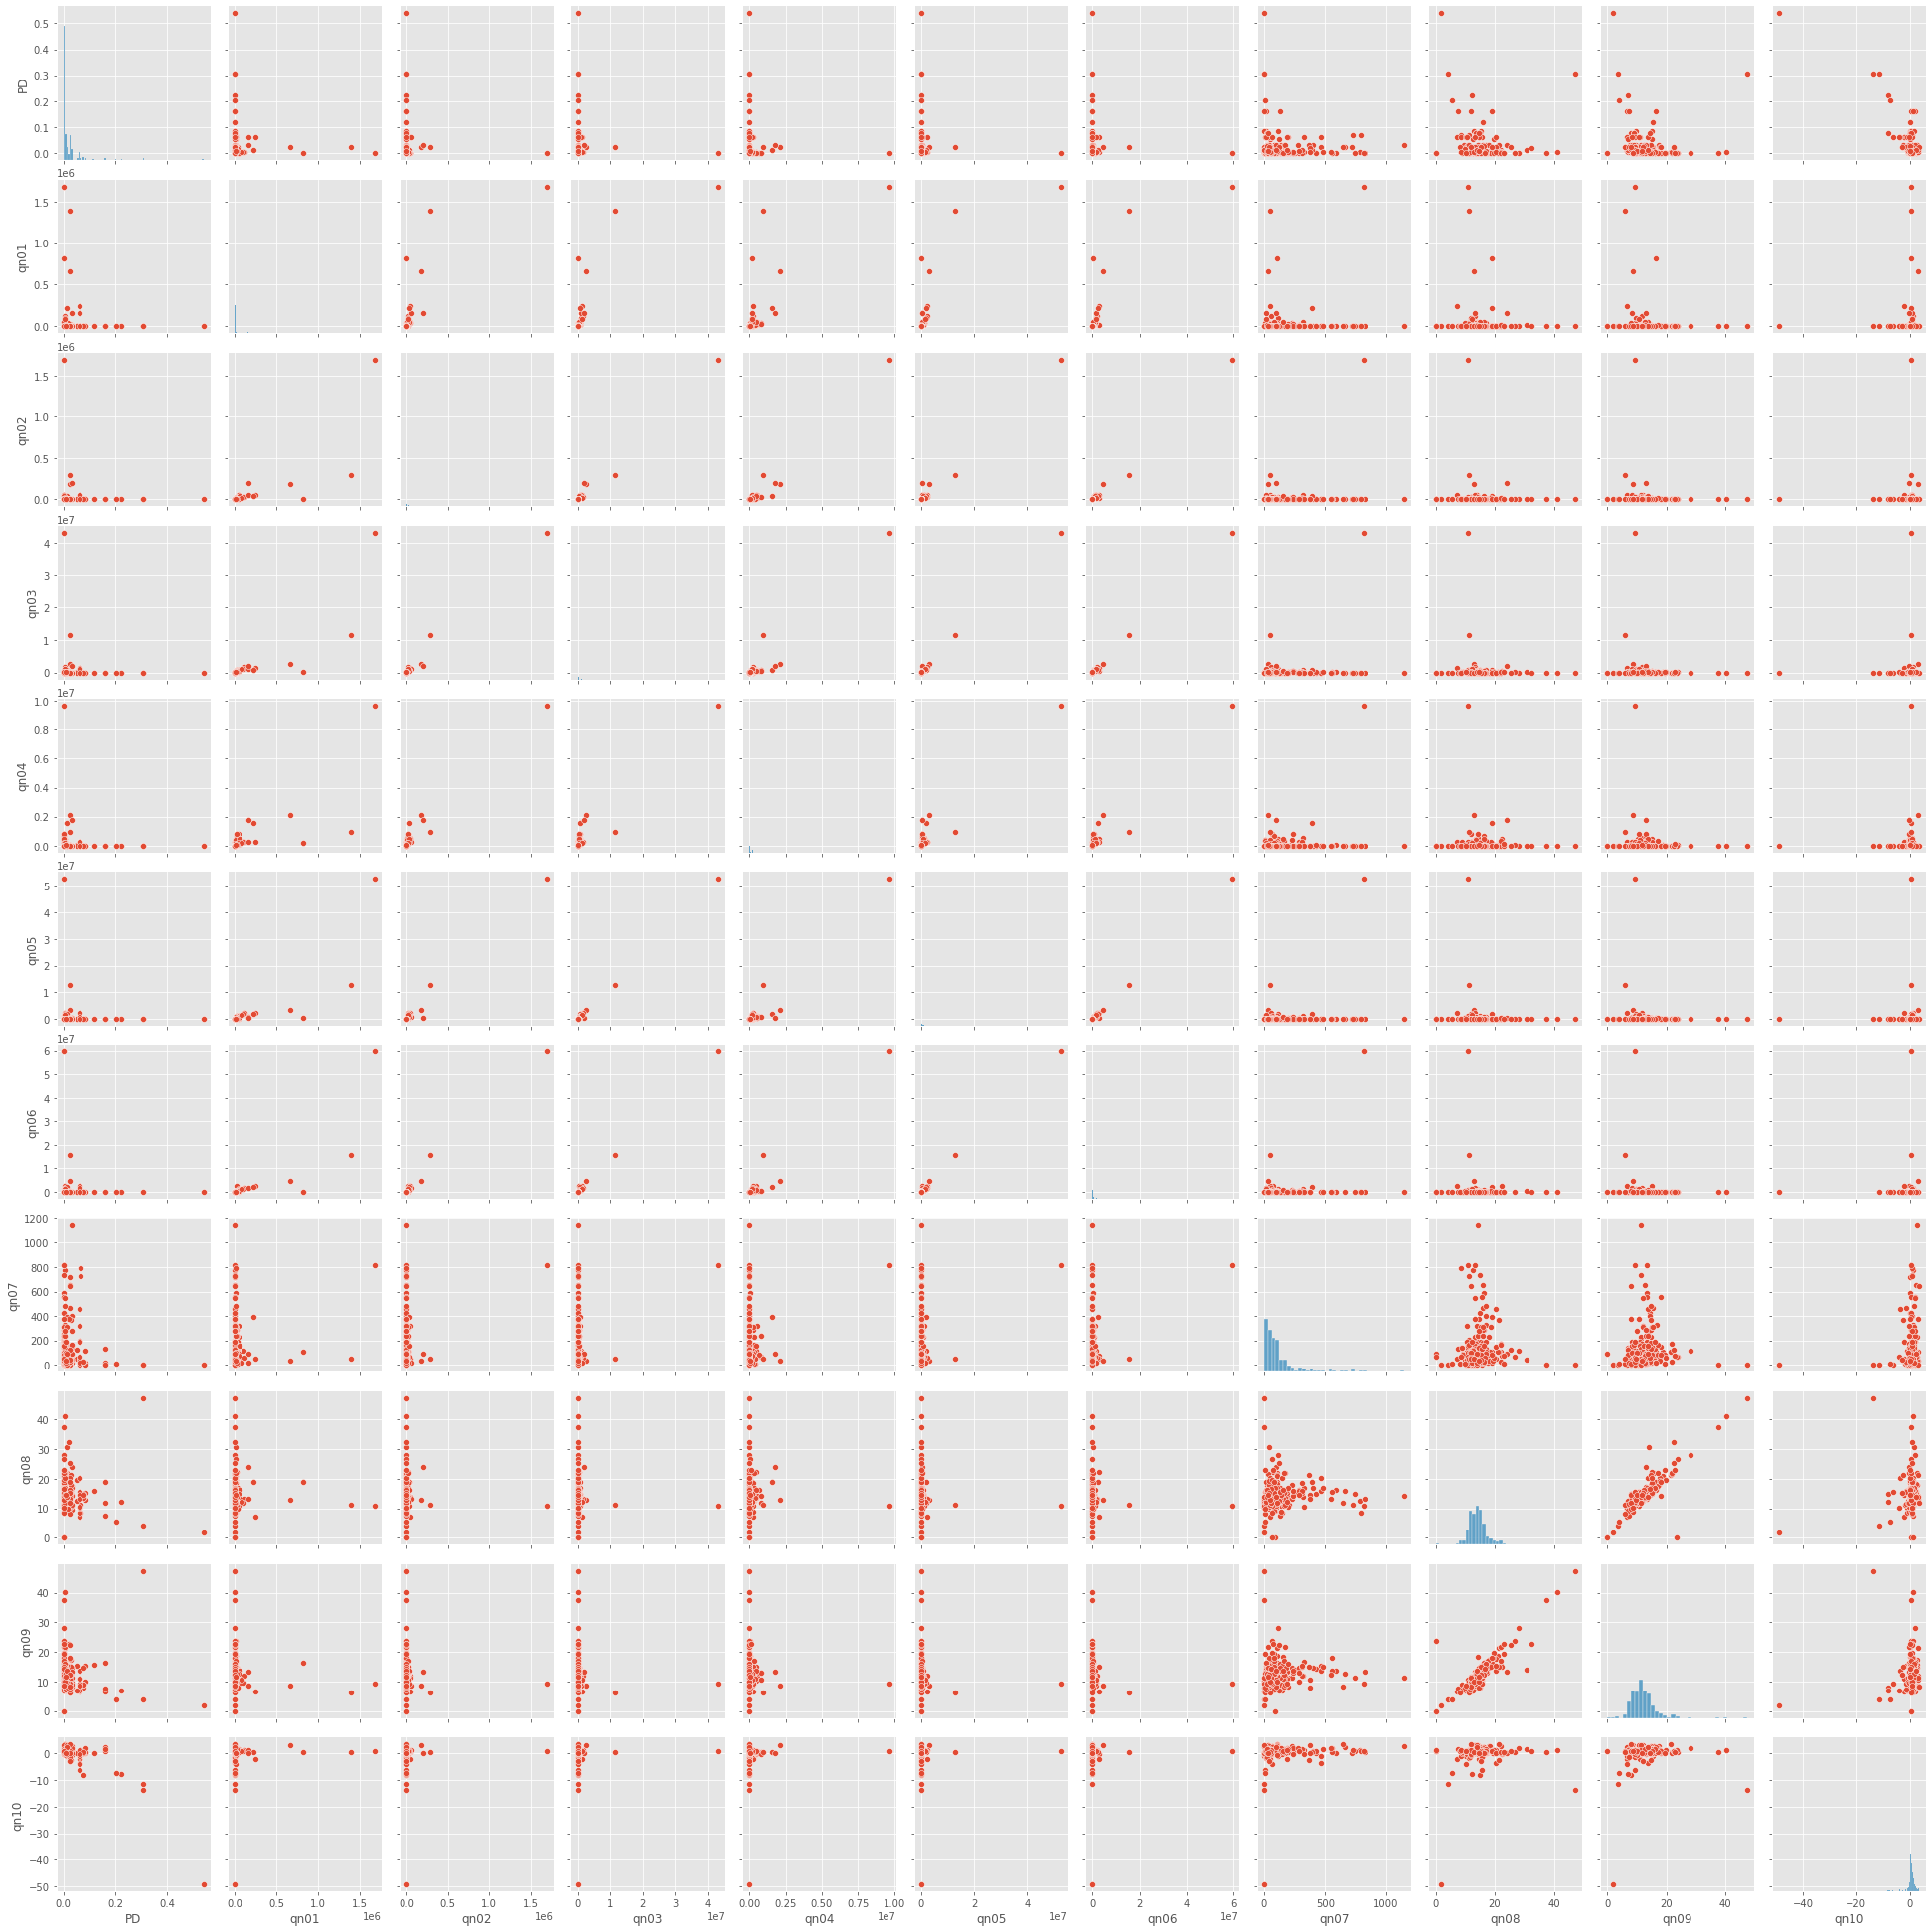

In [530]:
sns.pairplot(data)
None

Смотря на попарные зависимости фичей, видимых зависимостей значения целевого признака от значения признаков не наблюдается.
Зато сразу видно, что данные нуждаются в нормализации и видна явная зависимость между 8-м и 9-м фичами.

In [521]:
X_train.describe() #Смотрим на числовые характеристики фичей

,qn01,qn02,qn03,qn04,qn05,qn06,qn07,qn08,qn09,qn10
count,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.120000e+02,212.000000,212.000000,212.000000,212.000000
mean,2.130123e+04,1.282272e+04,3.327616e+05,1.205215e+05,3.902764e+05,4.079605e+05,119.472973,13.941358,10.436468,0.238574
std,1.307216e+05,1.171217e+05,2.970584e+06,6.909883e+05,3.629990e+06,4.099304e+06,162.301236,5.698350,6.365565,3.834176
min,1.895667e+01,6.712042e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-49.060000
25%,2.871285e+02,1.298428e+02,3.565448e+03,4.438717e+02,3.580262e+03,1.031680e+03,26.558400,11.941600,8.351200,0.223740
50%,1.092211e+03,5.893435e+02,1.773551e+04,2.985115e+03,2.161825e+04,1.029339e+04,69.562680,13.710400,10.916400,0.633600
75%,5.560365e+03,2.929468e+03,1.262620e+05,3.896693e+04,9.815469e+04,8.454755e+04,122.020140,15.644200,13.464000,1.074920
max,1.680993e+06,1.693916e+06,4.320018e+07,9.659306e+06,5.277921e+07,5.961017e+07,814.204160,47.282400,47.282400,3.360720


In [531]:
X_train.corr().style.background_gradient(cmap='coolwarm')   


,qn01,qn02,qn03,qn04,qn05,qn06,qn07,qn08,qn09,qn10
qn01,1.000000,0.889663,0.891080,0.885918,0.889665,0.889759,0.253132,-0.002989,0.001340,0.008354
qn02,0.889663,1.000000,0.996237,0.978018,0.992504,0.992158,0.289713,-0.021817,-0.008936,0.007699
qn03,0.891080,0.996237,1.000000,0.968535,0.998884,0.998304,0.285787,-0.033455,-0.011050,0.009145
qn04,0.885918,0.978018,0.968535,1.000000,0.964974,0.962554,0.291310,-0.003412,-0.008995,0.007999
qn05,0.889665,0.992504,0.998884,0.964974,1.000000,0.999487,0.289856,-0.038968,-0.015311,0.008602
qn06,0.889759,0.992158,0.998304,0.962554,0.999487,1.000000,0.291590,-0.038568,-0.016846,0.008417
qn07,0.253132,0.289713,0.285787,0.291310,0.289856,0.291590,1.000000,-0.136243,-0.123140,0.094365
qn08,-0.002989,-0.021817,-0.033455,-0.003412,-0.038968,-0.038568,-0.136243,1.000000,0.672622,0.042835
qn09,0.001340,-0.008936,-0.011050,-0.008995,-0.015311,-0.016846,-0.123140,0.672622,1.000000,0.008282
qn10,0.008354,0.007699,0.009145,0.007999,0.008602,0.008417,0.094365,0.042835,0.008282,1.000000


Видно, что почему-то 6 признаков коррелируют между собой ( Что очень странно )

<b>1. Внимательно изучите данные. </b>

<b>2. Трансформация количественных факторов</b>

Проведите логистическую трансформацию факторов и стандартизацию факторов. Данная процедура состоит из двух шагов.

<b>Шаг 1.</b> К факторам qn01-qn10 применяется логистическое преобразование,в результате которого значения фактора заносятся в интервал (0,1):






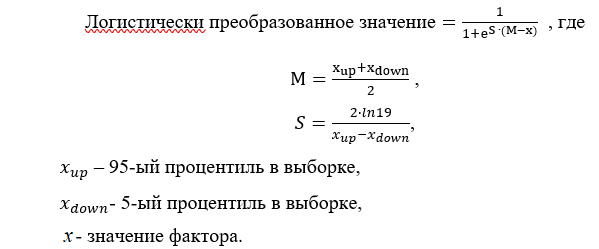

In [187]:
Image("formula_0.png")

In [17]:
# Производим логическое преобразование
def LogicSCAL(X):
    for i in range(X.shape[1]):
        M = (X.quantile(q=0.95, axis=0)+ X.quantile(q=0.5, axis=0))/2
        S= (2*np.log(19))/(X.quantile(q=0.95, axis=0)- X.quantile(q=0.5, axis=0))
        X.iloc[:,i] = 1/(1+np.exp((M[i] - X.iloc[:,i])*S[i]))
    return(X)
X_train_norm = LogicSCAL(X_train)
X_test_norm = LogicSCAL(X_test)

<b>Шаг 2.</b> Стандартизация 


Полученные в результате стандартизации величины имеют среднее равное 0, и стандартное отклонение равное 50. 

Для каждого значения x фактора преобразованный балл T рассчитывается по следующей формуле:



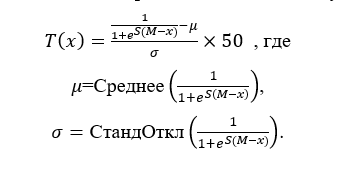

In [248]:
Image("formula_1.png")

In [18]:
def StandartSCAL(X):
    for i in range(X.shape[1]):
        avarage = X.mean(axis=0)
        std = X.std(axis=0)
        X.iloc[:,i] =  ((X.iloc[:,i] - avarage[i])*50)/std[i]
    return(X)
X_train_normalize = StandartSCAL(X_train_norm)
X_test_normalize = StandartSCAL(X_test_norm)
X_test_normalize.describe() #Проверили что среднее и дисперсию 

,qn01,qn02,qn03,qn04,qn05,qn06,qn07,qn08,qn09,qn10
count,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01
mean,5.387632e-15,-1.354716e-14,-1.366428e-15,1.604577e-14,2.342449e-15,-2.365873e-14,8.393774e-15,-1.221977e-14,-7.105427e-15,4.255448e-15
std,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
min,-2.070484e+01,-1.647902e+01,-1.974276e+01,-1.825920e+01,-1.783753e+01,-1.760647e+01,-2.417918e+01,-2.381934e+01,-2.619418e+01,-2.801312e+01
25%,-2.062272e+01,-1.640220e+01,-1.964178e+01,-1.824468e+01,-1.775126e+01,-1.747036e+01,-2.378847e+01,-2.336006e+01,-2.576950e+01,-2.783401e+01
50%,-2.031988e+01,-1.616375e+01,-1.930805e+01,-1.815840e+01,-1.744335e+01,-1.700359e+01,-2.215755e+01,-2.093901e+01,-2.292076e+01,-2.577126e+01
75%,-1.814071e+01,-1.519387e+01,-1.774828e+01,-1.740367e+01,-1.665601e+01,-8.332621e+00,-1.164153e+01,-1.059151e+01,-1.234369e+01,-1.111270e+00
max,1.432240e+02,1.740481e+02,1.565067e+02,1.562977e+02,1.738786e+02,1.750778e+02,1.370964e+02,1.559502e+02,1.423100e+02,1.264873e+02


<b>3. Многофакторный анализ</b>

Постройте многомерную регрессию, используя все факторы. Воспользуйтесь формулой ниже:



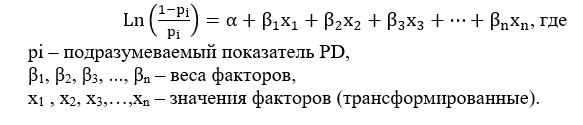

In [11]:
Image("formula_6.png")

In [26]:
#Пересчитаем pi для того,чтобы реализовать  регрессию
y_testing =  np.log((1 - y_test)/y_test)
y_traing =  np.log((1 - y_train)/y_train)
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score

# Делаем кросс валидацию и ходим по сеткам в тех рекгрессорах, где есть гиперпараметры.

lasso_params = {'alpha':[ 0.02 ,  0.024, 0.025, 0.026, 0.03, 1, 2, 3, 5, 10, 30]}
ridge_params = {'alpha':[200, 230, 250, 265, 270, 275, 290, 300, 500 , 1 , 2 , 5 , 10, 15, 20, 40, 60]}
knn_params   = {'n_neighbors': [1, 2, 3, 4, 6, 8, 10, 15,20,30] }


linear_regressor  = LinearRegression()        #Линейная регрессия 
linear_regressor.fit(X_train_normalize,y_traing)
y_pred1 = linear_regressor.predict(X_test_normalize)


knn = GridSearchCV(KNeighborsRegressor(), 
                                param_grid=knn_params, scoring = r2_score, cv = 5)            #K ближайших соседей
knn.fit(X_train_normalize,y_traing)
y_pred2 = knn.predict(X_test_normalize)
lasso_regressor = GridSearchCV(Lasso(), 
                               param_grid=lasso_params, scoring = r2_score,cv = 5)              #C лассо регуляризацией
lasso_regressor.fit(X_train_normalize,y_traing)
y_pred3 = lasso_regressor.predict(X_test_normalize)

ridge_regressor = GridSearchCV(Ridge(), 
                               param_grid=ridge_params, scoring = r2_score, cv = 5)                #C ridge регуляризацией 
ridge_regressor.fit(X_train_normalize,y_traing)
y_pred4 = ridge_regressor.predict(X_test_normalize)



3.1.	Для оценки полученной модели используйте следующий критерий:

 

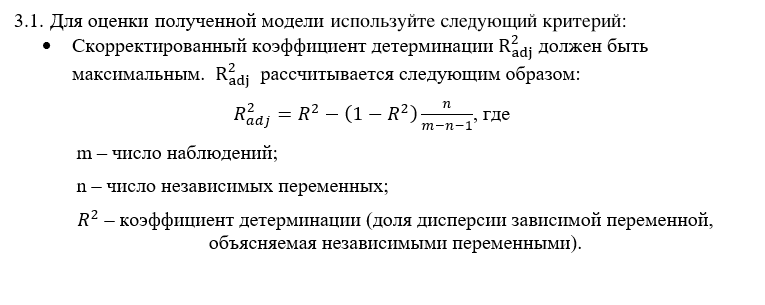

In [20]:
Image("formula_7.png")

In [27]:
def R_adj(y_testing, y_pred,X): #Реализуем скорректрированный коэффицент корреляции
    R = sklearn.metrics.r2_score(y_testing, y_pred)
    return R**2-(1-R**2)*len(y_pred)/(X.shape[1]-len(y_pred)-1)

print(r2_score(y_testing, y_pred1))
print(r2_score(y_testing, y_pred2))
print(r2_score(y_testing, y_pred3))
print(r2_score(y_testing, y_pred4))



print('Скорректированный коэффицент(линейная рег.):', (R_adj(y_testing, y_pred1,X_test_normalize)))
print('Скорректированный коэффицент(соседи):', (R_adj(y_testing, y_pred2,X_test_normalize)))
print('Скорректированный коэффицент(лассо):', (R_adj(y_testing, y_pred3,X_test_normalize)))
print('Скорректированный коэффицент(ridge):', (R_adj(y_testing, y_pred4,X_test_normalize)))

0.14167369241062644
-0.5524039437062185
0.14140360213383418
0.14152901790492822
Скорректированный коэффицент(линейная рег.): 1.1075531351696177
Скорректированный коэффицент(соседи): 1.0762640115463458
Скорректированный коэффицент(лассо): 1.1075615267284415
Скорректированный коэффицент(ridge): 1.1075576321197294


### 3.2.	На основании критерия из пп. 3.1. сделайте вывод о качестве полученной PD модели.

Стоит отметить, что по таблице корреляции пирсона, оказалось что у шести признаков корреляция близка в еденице, что может подвести к мысле о мультиколлинеарности. Из-за мультиколиинеарности возможен рост коэффицентов у регрессии, что в реальности не сильно наблюдается. Лучший результат, достигнутый на скорректированной метрике, достигается на регрессии с L1 регуляризацией, однако результаты моделей с регуляризацие и без неё не сильно отличаются, т.к. коэффиценты при не сильно большие, а значит и больших шрафов быть не должно. О качестве моделей я могу сказать, что они получились  на уровне оптимальных
«константных» моделей. С чем это может быть связано ? У меня есть два варианта, либо модели слишком просты, либо недостаточно данных, 330 объектов - не сильно большая выборка. Стоит также отметить, что результаты работы моделей почти не отличались для разного вида заполнений пропусков: Нулями или средними значениями. 

# P.S.

In [ ]:
На собеседовании от волнения, сказал, что забыл метрики для регресии, но они в голове у меня были, т.к. их невозможно забыть 
это соответсвенно сумма квадратов отклонений, и сумма модулей отклонений.)